In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

In [2]:
# d = historical demand
# future_periods = number of periods for which we want to forecast
# n = number of periods to be averaged to find the forecast

def moving_average(demand, future_periods, n):
    columns = len(demand)
    
    demand = np.append(demand,[np.nan]*future_periods)
    forecast = np.full(columns + future_periods,np.nan)
    
    for t in range(n,columns):
        forecast[t] = np.mean(demand[t-n:t])
    
    forecast[t+1:] = np.mean(demand[t-n+1:t+1]) 
    
    df = pd.DataFrame.from_dict({'Demand':demand, 'Forecast':forecast, 'Error':demand-forecast})
    return df

In [17]:
d = [13,16,11,18,15,13,11,12,17,19,15,16]

df = moving_average(d, future_periods=3, n=1)

In [18]:
df

,Demand,Forecast,Error
0,13.0,NaN,NaN
1,16.0,13.0,3.0
2,11.0,16.0,-5.0
3,18.0,11.0,7.0
4,15.0,18.0,-3.0
5,13.0,15.0,-2.0
6,11.0,13.0,-2.0
7,12.0,11.0,1.0
8,17.0,12.0,5.0
9,19.0,17.0,2.0


for n=1, instant reaction to change in demand, also sensitive to noise

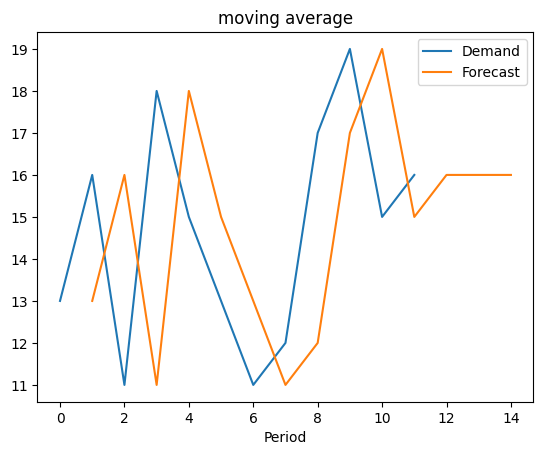

In [20]:
df[['Demand','Forecast']].plot(title = 'moving average')
df.index.name = 'Period'

In [23]:
d = [13,16,11,18,15,13,11,12,17,19,15,16,14,11,10,15,18,16]

df = moving_average(d, future_periods=3, n=5)

for n=5, reaction to demand change takes time

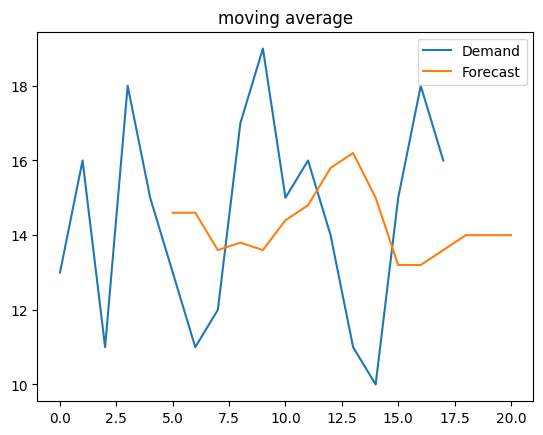

In [24]:
df[['Demand','Forecast']].plot(title = 'moving average')
df.index.name = 'Period'